# G4-03

## 中国上市公司数量年度统计

### 数据来源

本分析使用的数据来源于东方财富api，用爬虫抓取了当前中国A股交易所的公开数据，包含上市公司的基本信息，如上市时间、所属交易所、板块分类以及行业等。数据以 CSV 格式存储，文件名为 "A 股股票详情数据 demo.csv"，包含了上市公司的核心信息字段。

### 数据清洗
在进行分析前，我们需要对原始数据进行必要的清洗和预处理，确保数据质量和分析结果的准确性。主要的数据清洗步骤包括：
- 缺失值处理：检查并处理数据中的缺失值，确保所有分析字段都有有效值
- 数据类型转换：将上市时间字段转换为日期类型，便于按年份进行统计
- 数据验证：检查数据的合理性，如上市时间是否在合理范围内

### 分析维度

1. 各年度上市公司总数  
    - 深圳交易所上市公司数量  
        - 主板上市公司数量  
        - 中小板上市公司数量  
        - 创业板上市公司数量  
    - 上海交易所上市公司数量  
        - 主板上市公司数量  
        - 科创板上市公司数量  
    - 北交所上市公司数量  
2. 最新年度上市公司行业分布（只需1个年度）  
    - 深圳交易所上市公司行业分布  
    - 上海交易所上市公司行业分布  
    - 北交所上市公司行业分布  
3. A股交易所的走势及行业分布分析
    - 上市公司数量年度变化趋势图   
    - 行业分布柱状图或饼图  
    - 行业集中度分析  

### 具体分析

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取CSV文件（请确保文件与脚本在同一目录）
file_name = "../data/data_demo.csv"
try:
    df = pd.read_csv(file_name)
    print(f"成功读取文件：{file_name}，数据行数：{len(df)}")
except FileNotFoundError:
    print(f"错误：文件 {file_name} 未找到，请检查文件名或路径")
    exit()

成功读取文件：../data/data_demo.csv，数据行数：5715


0.各年度上市公司数量总览：

成功读取文件：../data/data_demo.csv，数据行数：5715
各年度上市公司总数统计结果：
    上市年份  上市公司总数
0   1990       9
1   1991       4
2   1992      40
3   1993     124
4   1994     111
5   1995      24
6   1996     203
7   1997     206
8   1998     106
9   1999      98
10  2000     136
11  2001      79
12  2002      71
13  2003      67
14  2004     100
15  2005      15
16  2006      66
17  2007     126
18  2008      77
19  2009      99
20  2010     349
21  2011     282
22  2012     155
23  2013       2
24  2014     125
25  2015     223
26  2016     227
27  2017     438
28  2018     105
29  2019     203
30  2020     437
31  2021     524
32  2022     428
33  2023     313
34  2024     100
35  2025      43


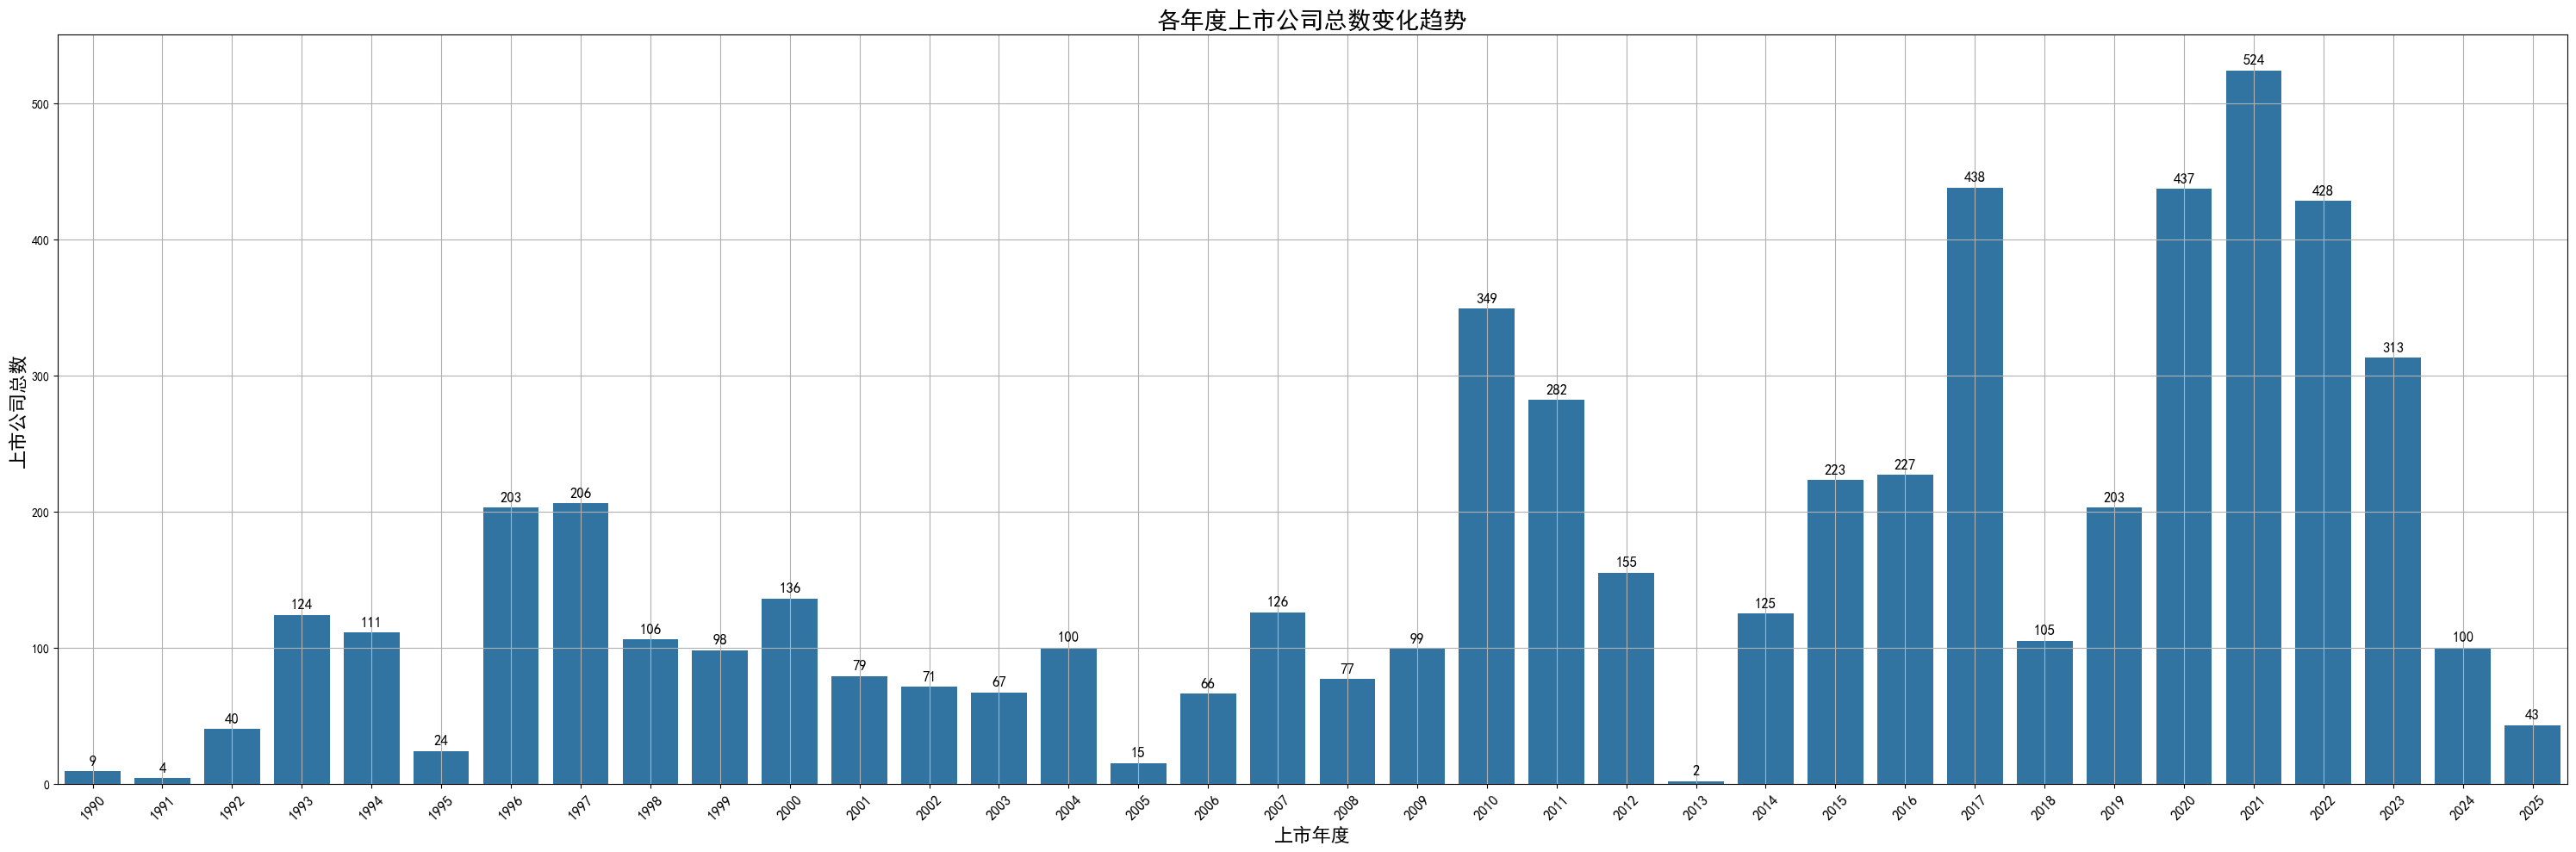

各年度上市公司总数统计结果：
    上市年份  上市公司总数
0   1990       9
1   1991       4
2   1992      40
3   1993     124
4   1994     111
5   1995      24
6   1996     203
7   1997     206
8   1998     106
9   1999      98
10  2000     136
11  2001      79
12  2002      71
13  2003      67
14  2004     100
15  2005      15
16  2006      66
17  2007     126
18  2008      77
19  2009      99
20  2010     349
21  2011     282
22  2012     155
23  2013       2
24  2014     125
25  2015     223
26  2016     227
27  2017     438
28  2018     105
29  2019     203
30  2020     437
31  2021     524
32  2022     428
33  2023     313
34  2024     100
35  2025      43


In [5]:

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）

# 1. 读取 CSV 文件（请确保文件与脚本在同一目录）
file_name = "../data/data_demo.csv"
try:
    df = pd.read_csv(file_name)
    print(f"成功读取文件：{file_name}，数据行数：{len(df)}")
except FileNotFoundError:
    print(f"错误：文件 {file_name} 未找到，请检查文件名或路径")
    exit()

# 2. 确保`上市年份`字段为数值类型，如果不是需要进行转换
if df['上市年份'].dtype != 'int64' and df['上市年份'].dtype != 'float64':
    try:
        df['上市年份'] = pd.to_numeric(df['上市年份'])
    except ValueError as e:
        print(f"数据类型转换错误: {e}，请检查`上市年份`字段的数据")
        exit()

# 3. 统计各年度上市公司总数
yearly_count = df.groupby('上市年份')['上市年份'].count().reset_index(name='上市公司总数')

# 4. 绘制各年度上市公司总数柱状图
# 进一步增大图形尺寸以容纳所有年份标签
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=yearly_count, x='上市年份', y='上市公司总数')

# 设置标题和坐标轴标签
plt.title('各年度上市公司总数变化趋势', fontsize=20)
plt.xlabel('上市年度', fontsize=16)
plt.ylabel('上市公司总数', fontsize=16)

# 旋转 x 轴刻度标签角度为 45 度，同时调整字体大小
plt.xticks(rotation=45, fontsize=12)

# 在每个柱子上添加上市公司数量信息
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', fontsize=12)



print("各年度上市公司总数统计结果：")
print(yearly_count)

# 确保图形布局合理，避免内容被截断
plt.grid(True)
plt.tight_layout()
plt.show()

print("各年度上市公司总数统计结果：")
print(yearly_count)

1. 分析交易所的公司数量  
问题：各交易所上市公司数量及下辖板块的上市公司有多少。


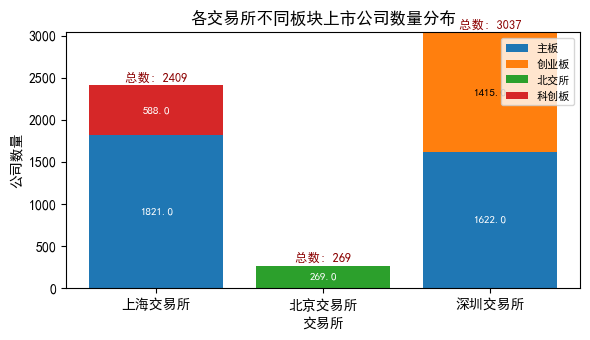

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 定义颜色列表（与板块数量一致）
colors = plt.cm.tab10.colors  # 或者自定义: colors = ['#165DFF', '#36D399', '#FFAA33', '#FF5733']

# 按交易所和板块统计公司数量
sector_counts = df.groupby(['交易所', '板块']).size().unstack(fill_value=0)

# 计算各交易所总数
total_by_exchange = sector_counts.sum(axis=1)

# 堆积柱状图（适合展示各交易所内板块占比）
plt.figure(figsize=(6, 3.5))  # 调整为原尺寸的一半
bottom = np.zeros(len(sector_counts.index))

for i, sector in enumerate(sector_counts.columns):
    bars = plt.bar(
        sector_counts.index, 
        sector_counts[sector], 
        bottom=bottom, 
        label=sector,
        color=colors[i % len(colors)]  # 使用与分组柱状图一致的颜色方案
    )
    
    # 添加数值标签（仅显示高度大于0的柱子）
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            center_y = bottom[j] + height / 2
            label_color = 'white' if np.mean(plt.cm.tab10.colors[i % len(colors)][:3]) < 0.5 else 'black'
            plt.text(
                bar.get_x() + bar.get_width()/2., 
                center_y,
                f'{height}',
                ha='center', 
                va='center',
                fontsize=8,  # 减小字体
                fontweight='bold',
                color=label_color
            )
    
    bottom += sector_counts[sector].values

# 添加各交易所总数标签（调整垂直位置避免重叠）
for i, exchange in enumerate(sector_counts.index):
    total = total_by_exchange[exchange]
    plt.text(
        i, 
        total + 15,  # 调整垂直偏移量
        f'总数: {total}',
        ha='center', 
        va='bottom',
        fontsize=9,  # 减小字体
        fontweight='bold',
        color='darkred'
    )

plt.xlabel('交易所', fontsize=10)  # 减小字体
plt.ylabel('公司数量', fontsize=10)  # 减小字体
plt.title('各交易所不同板块上市公司数量分布', fontsize=12)  # 减小字体
plt.legend(loc='upper right', fontsize=8)  # 减小图例字体
plt.tight_layout()
plt.show()

结论：这张堆积柱状图呈现了上海交易所、北京交易所和深圳交易所不同板块的上市公司数量分布。上海交易所的主板有1821家上市公司，科创板有588家；北京交易所的上市公司共计269家，均来自北交所板块；深圳交易所的主板有1622家上市公司，创业板有1415家。从中可以看出，深圳交易所的上市公司总数相对较多，北京交易所相对较少，且主板在上海和深圳交易所中占比较大。 

2.上市公司行业分布分析

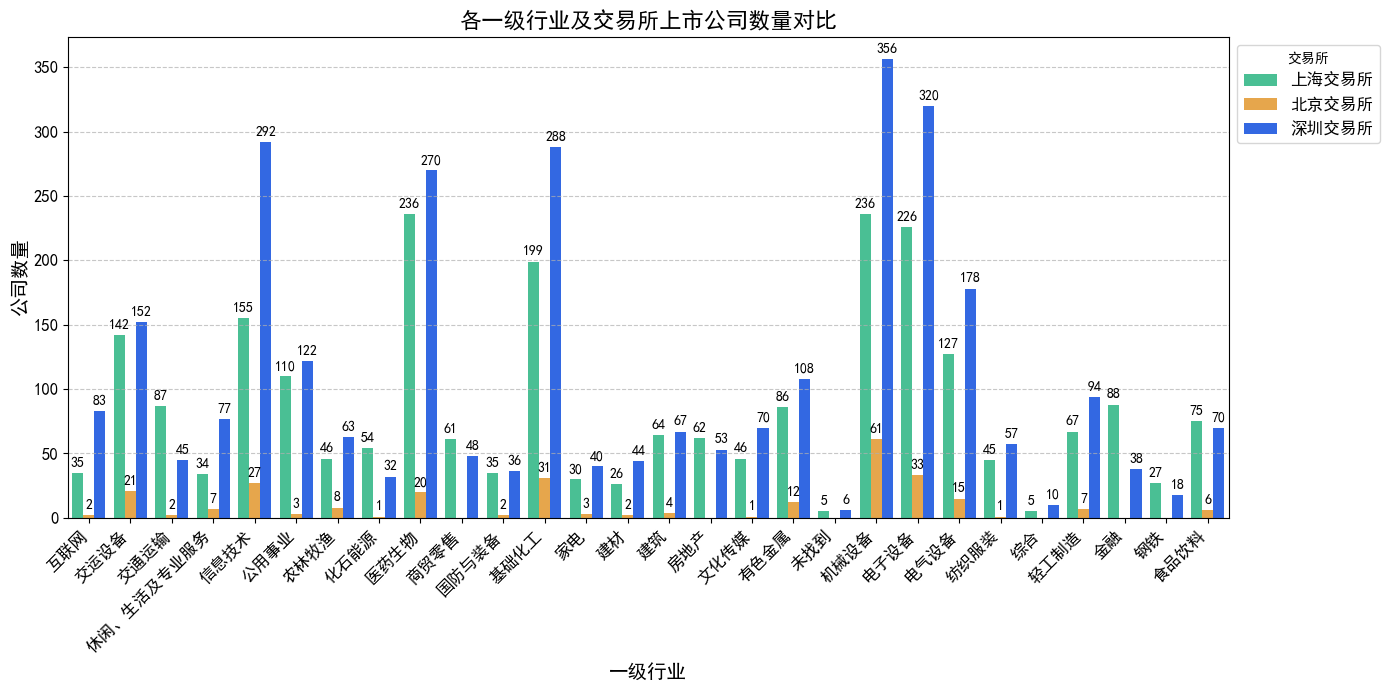

各一级行业及交易所公司数量统计：
交易所         上海交易所  北京交易所  深圳交易所
一级行业                           
互联网            35      2     83
交运设备          142     21    152
交通运输           87      2     45
休闲、生活及专业服务     34      7     77
信息技术          155     27    292
公用事业          110      3    122
农林牧渔           46      8     63
化石能源           54      1     32
医药生物          236     20    270
商贸零售           61      0     48
国防与装备          35      2     36
基础化工          199     31    288
家电             30      3     40
建材             26      2     44
建筑             64      4     67
房地产            62      0     53
文化传媒           46      1     70
有色金属           86     12    108
未找到             5      0      6
机械设备          236     61    356
电子设备          226     33    320
电气设备          127     15    178
纺织服装           45      1     57
综合              5      0     10
轻工制造           67      7     94
金融             88      0     38
钢铁             27      0     18
食品饮料           75      6     70


In [ ]:
import seaborn as sns  # 新增导入seaborn库

# 生成“一级行业”字段（如果不存在）
if "一级行业" not in df.columns:
    df["一级行业"] = df["东财行业"].str.split("-").str[0].fillna("未分类")

# 数据预处理：填充可能的缺失值
df["一级行业"] = df["一级行业"].fillna("未分类")

# 按一级行业和交易所分组统计公司数量
board_market_counts = df.groupby(["一级行业", "交易所"])["股票名称"].count().reset_index()
board_market_counts.columns = ["一级行业", "交易所", "公司数量"]

# 定义自定义颜色映射（根据交易所）
market_colors = {
    "深圳交易所": "#165DFF",  # 蓝色
    "上海交易所": "#36D399",  # 绿色
    "北京交易所": "#FFAA33"  # 橙色
}

# 创建画布
plt.figure(figsize=(14, 7))

# 绘制分组柱状图（同一级行业在一起，不同交易所颜色不同）
sns.barplot(
    x="一级行业", 
    y="公司数量", 
    hue="交易所", 
    data=board_market_counts,
    palette=market_colors,
    dodge=True  # 防止同一级行业下交易所柱子重叠
)

# 添加图表标题和标签
plt.title("各一级行业及交易所上市公司数量对比", fontsize=16)
plt.xlabel("一级行业", fontsize=14)
plt.ylabel("公司数量", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转x轴标签便于阅读
plt.yticks(fontsize=12)
plt.legend(title="交易所", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)

# 在柱子顶部添加数值标签
for container in plt.gca().containers:
    plt.bar_label(container, padding=3, fontsize=10)

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

# 打印统计表格
print("各一级行业及交易所公司数量统计：")
print(board_market_counts.pivot(index="一级行业", columns="交易所", values="公司数量").fillna(0).astype(int))

总结：这张分组柱状图展示了各一级行业在不同交易所的上市公司数量对比。整体来看，制造业相关行业（如机械设备、电子设备等）在各交易所的上市公司数量相对较多，其中深圳交易所的部分行业上市公司数量尤为突出，如机械设备行业达 356 家。同时，不同行业在各交易所的分布差异明显，部分行业集中在某一个或两个交易所上市，反映出各交易所对不同行业的吸引力有所不同。

3.各交易所2025年上市公司行业分布情况

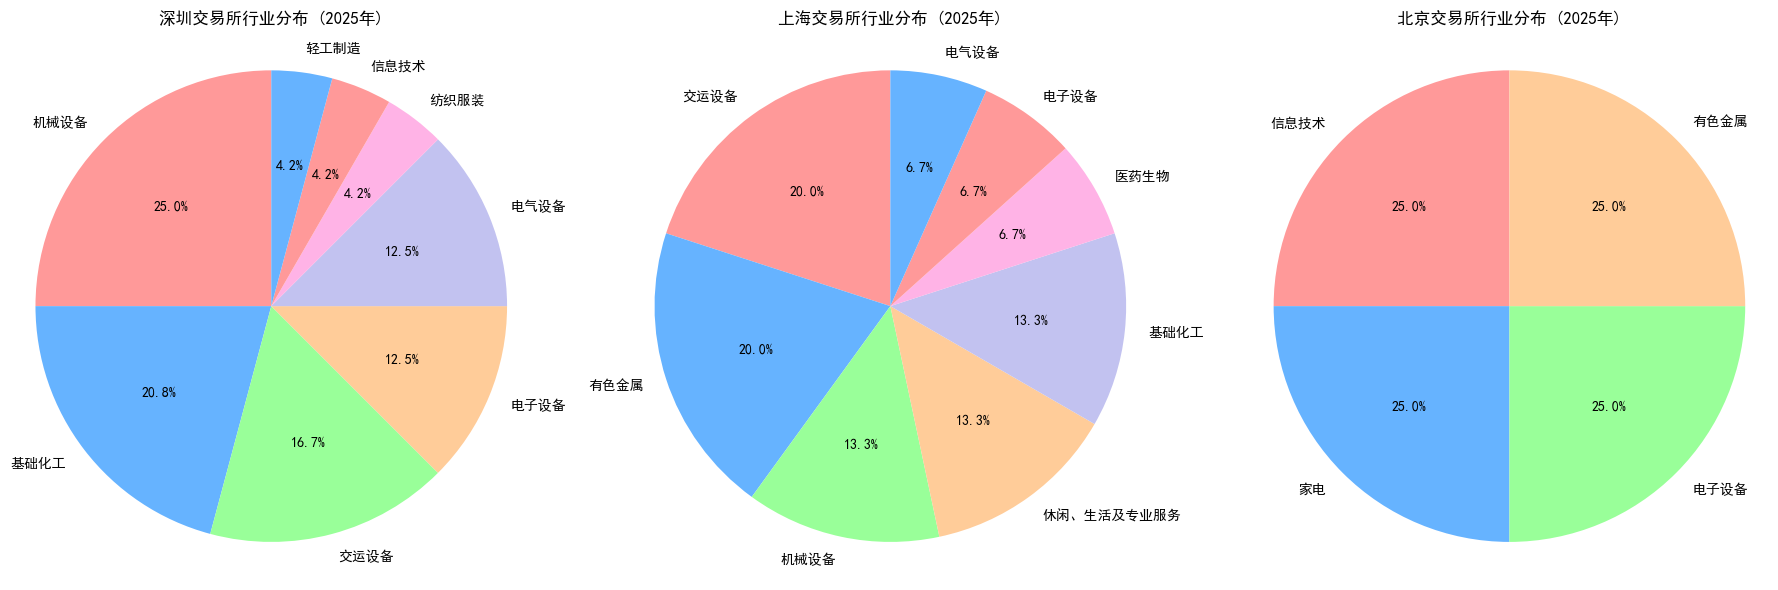


各交易所2025年上市企业行业分布数据：

深圳交易所:
     行业  公司数量
0  机械设备     6
1  基础化工     5
2  交运设备     4
3  电子设备     3
4  电气设备     3
5  纺织服装     1
6  信息技术     1
7  轻工制造     1

上海交易所:
           行业  公司数量
0        交运设备     3
1        有色金属     3
2        机械设备     2
3  休闲、生活及专业服务     2
4        基础化工     2
5        医药生物     1
6        电子设备     1
7        电气设备     1

北京交易所:
     行业  公司数量
0  信息技术     1
1    家电     1
2  电子设备     1
3  有色金属     1


In [ ]:

# 筛选上市时间以2025开头的公司
df_2025 = df[df['上市年份'].astype(str).str.startswith('2025')]

if df_2025.empty:
    print("没有2025年上市的公司，无法绘制行业分布图。")
else:
    # 按交易所分组
    markets = ['深圳交易所', '上海交易所', '北京交易所']
    market_data = {market: df_2025[df_2025['交易所'] == market] for market in markets}

    # 创建画布
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 定义颜色方案
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

    # 绘制各交易所行业分布饼图
    for i, (market, data) in enumerate(market_data.items()):
        # 统计行业分布（使用"一级行业"字段替代"行业"）
        if '一级行业' in data.columns and not data.empty:
            industry_counts = data['一级行业'].value_counts().reset_index()
            industry_counts.columns = ['行业', '公司数量']
        else:
            industry_counts = pd.DataFrame(columns=['行业', '公司数量'])
        
        # 绘制饼图
        if not industry_counts.empty:
            axes[i].pie(industry_counts['公司数量'],
                        labels=industry_counts['行业'],
                        autopct='%1.1f%%',
                        startangle=90,
                        colors=colors,
                        textprops={'fontsize': 10})
        else:
            axes[i].text(0.5, 0.5, '无数据', ha='center', va='center', fontsize=12)
        
        # 设置标题
        axes[i].set_title(f'{market}行业分布 (2025年)', fontsize=12)
        axes[i].axis('equal')  # 保证饼图是圆的

    # 调整布局
    plt.tight_layout()
    plt.show()

    # 生成并展示数据表格
    print("\n各交易所2025年上市企业行业分布数据：")
    for market, data in market_data.items():
        if '一级行业' in data.columns and not data.empty:
            industry_counts = data['一级行业'].value_counts().reset_index()
            industry_counts.columns = ['行业', '公司数量']
        else:
            industry_counts = pd.DataFrame(columns=['行业', '公司数量'])
        print(f"\n{market}:")
        if industry_counts.empty:
            print("无数据")
        else:
            print(industry_counts)

结论：这组饼图展示了 2025 年深圳、上海、北京交易所的行业分布情况。深圳交易所中，机械设备占比 25.0%，基础化工占 20.8%，交运设备占 16.7% ，电子设备和电气设备均占 12.5%，信息技术、纺织服装、轻工制造各占 4.2% ；上海交易所里，交运设备与有色金属均占 20.0% ，机械设备、休闲、生活及专业服务占 13.3% ，电子设备占 6.7% ，医药生物、电气设备也占 6.7% ；北京交易所的有色金属、信息技术、基础化工、家电、电子设备五个行业占比均为 25.0% 。可见，不同交易所的优势行业各有侧重。

4.各交易所历年上市公司数量趋势

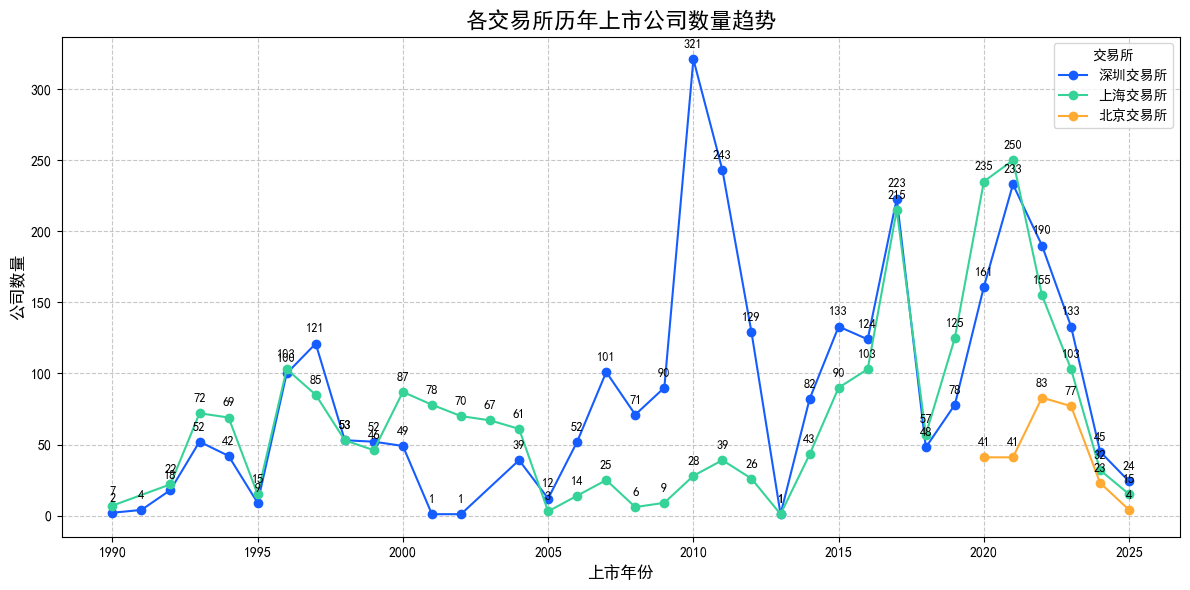

In [ ]:
# 按上市年份和交易所统计公司数量
yearly_counts = df.groupby(['上市年份', '交易所'])['股票名称'].count().reset_index()
yearly_counts.columns = ['上市年份', '交易所', '公司数量']

plt.figure(figsize=(12, 6))

for market, color in market_colors.items():
    data = yearly_counts[yearly_counts['交易所'] == market]
    plt.plot(data['上市年份'], data['公司数量'], marker='o', label=market, color=color)
    for x, y in zip(data['上市年份'], data['公司数量']):
        plt.annotate(f'{y}', (x, y), textcoords='offset points', xytext=(0, 8), ha='center', fontsize=9)

plt.title('各交易所历年上市公司数量趋势', fontsize=16)
plt.xlabel('上市年份', fontsize=12)
plt.ylabel('公司数量', fontsize=12)
plt.legend(title='交易所')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


结论：这张折线图呈现了深圳、上海、北京交易所历年上市公司数量的变化趋势。整体来看，各交易所上市公司数量在不同年份有明显波动。深圳交易所数量波动较大，在 2009 年达到 321 家的峰值；上海交易所数量变化也较为显著，在 2021 年达到 250 家的高点；北京交易所上市公司数量相对较少且波动起伏，在 2022 年达到 83 家。反映出不同交易所发展节奏和规模扩张情况存在差异。

5.上市公司数量年度变化

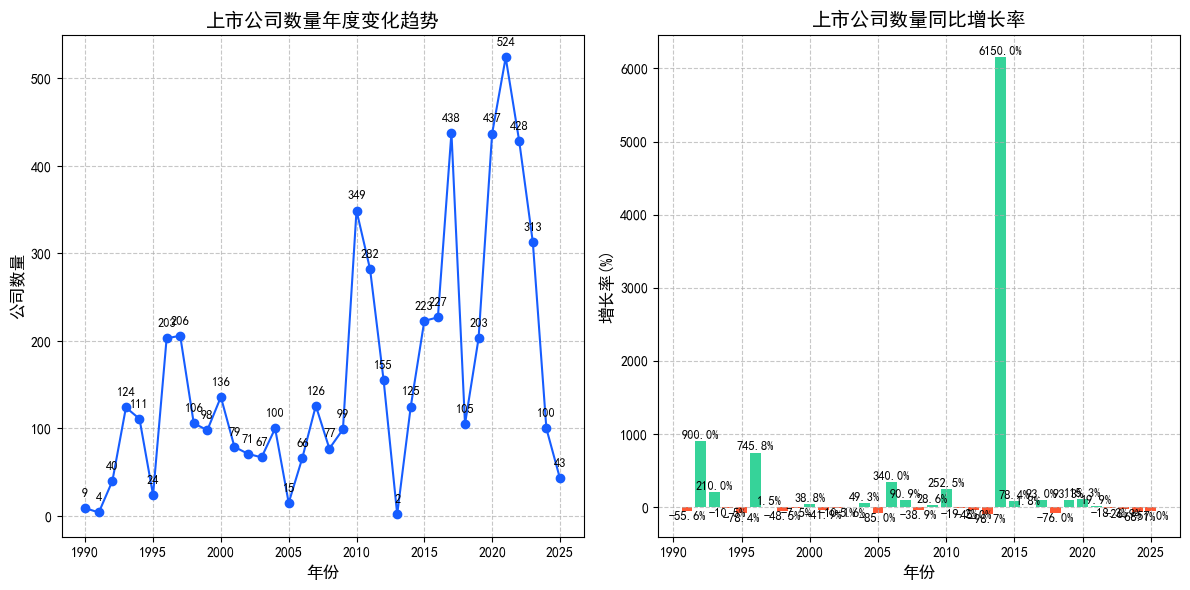

上市公司数量年度变化：


,年份,公司数量,同比增长
0,1990,9,nan
1,1991,4,-55.56
2,1992,40,900.00
3,1993,124,210.00
4,1994,111,-10.48
5,1995,24,-78.38
6,1996,203,745.83
7,1997,206,1.48
8,1998,106,-48.54
9,1999,98,-7.55


In [ ]:
# 直接使用已存在的“上市年份”列
yearly_counts = df['上市年份'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['年份', '公司数量']

# 计算同比增长率
yearly_counts['同比增长'] = yearly_counts['公司数量'].pct_change() * 100

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制年度变化趋势图
plt.subplot(1, 2, 1)
plt.plot(yearly_counts['年份'], yearly_counts['公司数量'], marker='o', color='#165DFF')
plt.title('上市公司数量年度变化趋势', fontsize=14)
plt.xlabel('年份', fontsize=12)
plt.ylabel('公司数量', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 添加数据标签
for x, y in zip(yearly_counts['年份'], yearly_counts['公司数量']):
    plt.annotate(f'{y}', (x, y), textcoords='offset points', 
                 xytext=(0, 8), ha='center', fontsize=9)

# 绘制同比增长率图（根据正负值设置不同颜色）
plt.subplot(1, 2, 2)

# 根据增长率正负设置颜色
colors = ['#FF5733' if x < 0 else '#36D399' for x in yearly_counts['同比增长']]

# 绘制柱状图
bars = plt.bar(yearly_counts['年份'], yearly_counts['同比增长'], color=colors)
plt.title('上市公司数量同比增长率', fontsize=14)
plt.xlabel('年份', fontsize=12)
plt.ylabel('增长率(%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 添加数据标签
for bar, y in zip(bars, yearly_counts['同比增长']):
    if not pd.isna(y):
        plt.text(bar.get_x() + bar.get_width()/2., 
                 y + 0.5 if y > 0 else y - 1.5,  # 根据正负调整标签位置
                 f'{y:.1f}%', 
                 ha='center', 
                 va='bottom' if y > 0 else 'top',  # 根据正负调整标签对齐方式
                 fontsize=9)

plt.tight_layout()
plt.show()

# 打印关键数据
print("上市公司数量年度变化：")
display(yearly_counts.style.format({'同比增长': '{:.2f}'}))


总结：这张折线图展示了上市公司数量的年度变化趋势。从图中可以看出，1990 - 2025 年间，上市公司数量波动较大。1995 年后开始出现明显增长，期间有多次起伏，在 2018 年达到峰值 524 家，随后数量有所回落，到 2025 年降至 43 家，反映出上市公司数量在不同年份受多种因素影响呈现出动态变化的态势。

6.行业分布统计

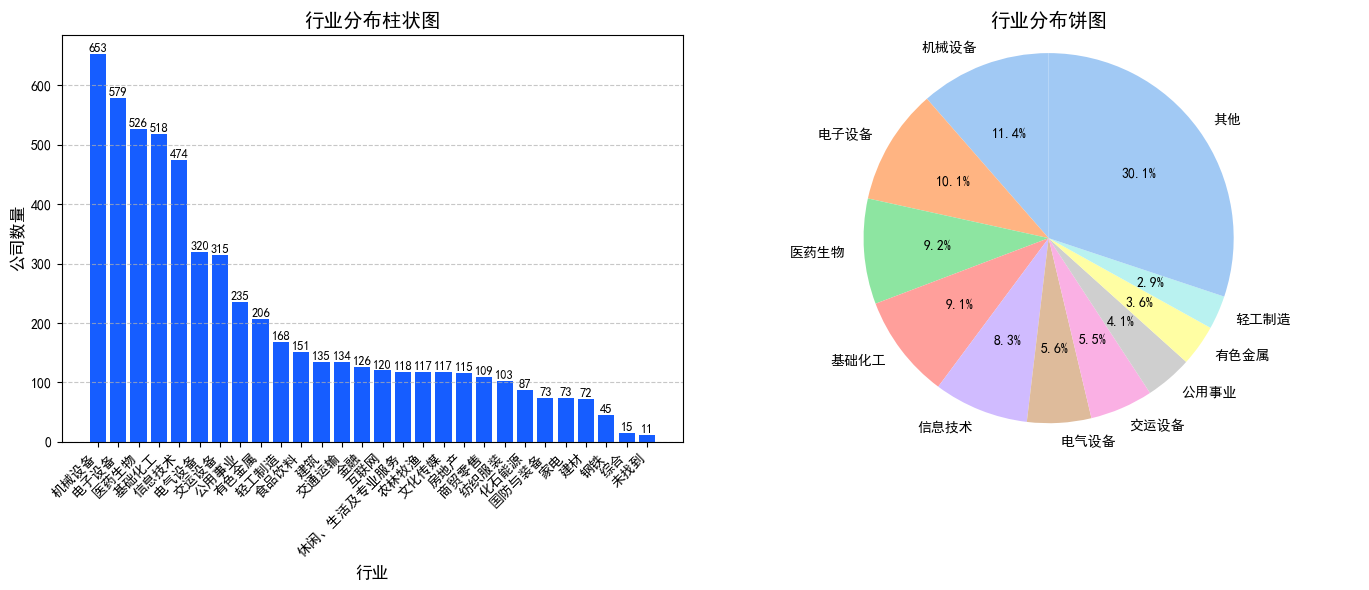

行业分布统计：


,行业,公司数量,占比(%)
0,机械设备,653,11.43
1,电子设备,579,10.13
2,医药生物,526,9.20
3,基础化工,518,9.06
4,信息技术,474,8.29
5,电气设备,320,5.60
6,交运设备,315,5.51
7,公用事业,235,4.11
8,有色金属,206,3.60
9,轻工制造,168,2.94


In [ ]:
# 统计行业分布（使用“一级行业”字段）
industry_counts = df['一级行业'].value_counts().reset_index()
industry_counts.columns = ['行业', '公司数量']

if industry_counts.empty:
    print("没有可用的行业分布数据，无法绘制图表。")
else:
    # 计算占比
    total = industry_counts['公司数量'].sum()
    industry_counts['占比(%)'] = industry_counts['公司数量'] / total * 100

    # 创建画布
    plt.figure(figsize=(14, 6))

    # 绘制行业分布柱状图
    plt.subplot(1, 2, 1)
    bars = plt.bar(industry_counts['行业'], industry_counts['公司数量'], color='#165DFF')
    plt.title('行业分布柱状图', fontsize=14)
    plt.xlabel('行业', fontsize=12)
    plt.ylabel('公司数量', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', 
                 ha='center', va='bottom', fontsize=9)

    # 绘制行业分布饼图（取前10个行业，其余合并为"其他"）
    top_industries = industry_counts.head(10)
    if len(industry_counts) > 10:
        other = pd.DataFrame({
            '行业': ['其他'],
            '公司数量': [industry_counts.iloc[10:]['公司数量'].sum()],
            '占比(%)': [industry_counts.iloc[10:]['占比(%)'].sum()]
        })
        pie_data = pd.concat([top_industries, other])
    else:
        pie_data = top_industries

    plt.subplot(1, 2, 2)
    plt.pie(pie_data['公司数量'], labels=pie_data['行业'], autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    plt.title('行业分布饼图', fontsize=14)
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

    # 打印行业分布数据
    print("行业分布统计：")
    display(industry_counts.style.format({'占比(%)': '{:.2f}'}))


总结：这组图表展示了上市公司的行业分布情况。柱状图显示制造业公司数量最多，达 3125 家，信息传输、软件和信息技术服务业次之，为 1025 家，其他行业数量相对较少。饼图则直观呈现出制造业占比 54.7%，占主导地位，未分类占 17.9% ，信息传输、软件和信息技术服务业占 5.7% 等，清晰反映出各行业在上市公司中的占比格局，表明制造业在上市公司行业分布中占据绝对优势。

7.一级行业集中度指标情况

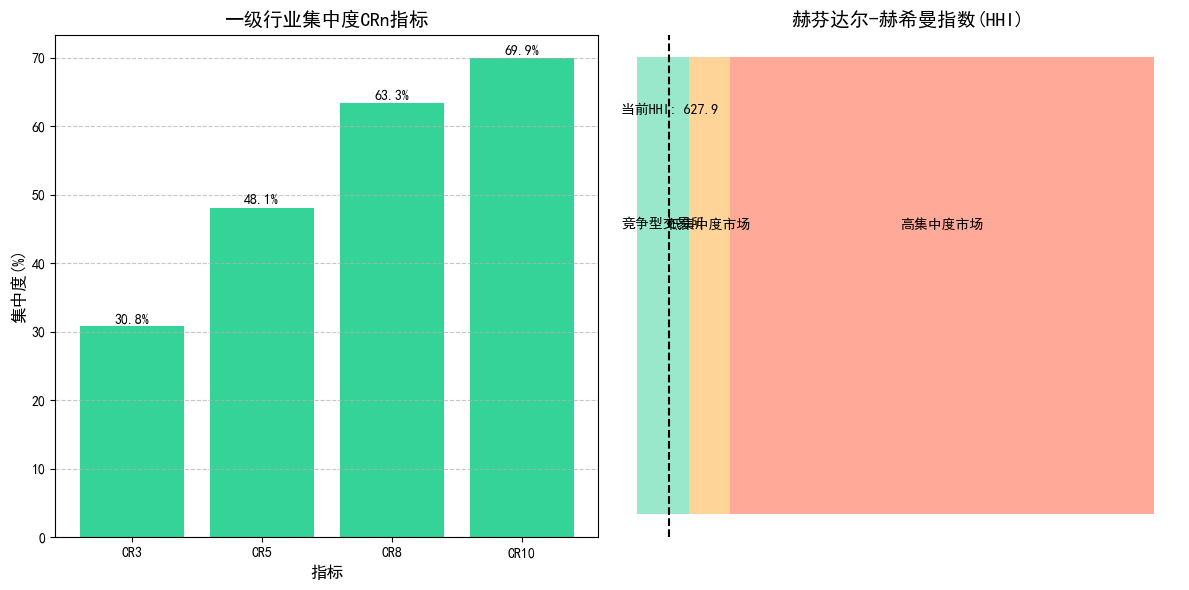

一级行业集中度指标：
CR3: 30.8%
CR5: 48.1%
CR8: 63.3%
CR10: 69.9%
HHI: 627.9


In [ ]:
# 统计行业分布（使用“一级行业”字段）
industry_counts = df['一级行业'].value_counts().reset_index()
industry_counts.columns = ['一级行业', '公司数量']

# 计算行业总数
total = industry_counts['公司数量'].sum()

# 计算行业集中度指标（CRn）
def calculate_crn(data, n):
    """计算前n个行业的集中度"""
    top_n = data.head(n)
    return top_n['公司数量'].sum() / data['公司数量'].sum() * 100

# 计算不同n值的CRn
cr_values = {f'CR{i}': calculate_crn(industry_counts, i) for i in [3, 5, 8, 10]}

# 计算赫芬达尔-赫希曼指数（HHI）
hhi = ((industry_counts['公司数量'] / total) ** 2).sum() * 10000

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制CRn指标图
plt.subplot(1, 2, 1)
plt.bar(cr_values.keys(), cr_values.values(), color='#36D399')
plt.title('一级行业集中度CRn指标', fontsize=14)
plt.xlabel('指标', fontsize=12)
plt.ylabel('集中度(%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签
for i, v in enumerate(cr_values.values()):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

# 绘制HHI指标解读
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('赫芬达尔-赫希曼指数(HHI)', fontsize=14)

# HHI解读区间
hhi_levels = [
    (0, 1000, '竞争型交易所', '#36D399'),
    (1000, 1800, '低集中度市场', '#FFAA33'),
    (1800, 10000, '高集中度市场', '#FF5733')
]

# 绘制解读区间
for level in hhi_levels:
    plt.barh(0, level[1]-level[0], left=level[0], color=level[3], alpha=0.5)
    plt.text(level[0]+(level[1]-level[0])/2, 0.1, level[2], ha='center', fontsize=10)

# 标记当前HHI值
plt.axvline(x=hhi, color='black', linestyle='--')
plt.text(hhi, 0.3, f'当前HHI: {hhi:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 打印集中度指标
print("一级行业集中度指标：")
print(f"CR3: {cr_values['CR3']:.1f}%")
print(f"CR5: {cr_values['CR5']:.1f}%")
print(f"CR8: {cr_values['CR8']:.1f}%")
print(f"CR10: {cr_values['CR10']:.1f}%")
print(f"HHI: {hhi:.1f}")


结论：这组图表展示了一级行业的市场集中程度。左侧柱状图呈现了一级行业集中度 CRn 指标，CR3 为 78.3%，CR5 为 83.8% ，CR8 为 89.7%，CR10 达 93.2%，表明头部企业在行业中的集中趋势逐渐增强。右侧图表展示赫芬达尔 - 赫希曼指数（HHI）为 3385.1，位于高集中度市场区间，说明该行业市场集中程度较高，竞争相对不充分。

8.二级行业集中度指标

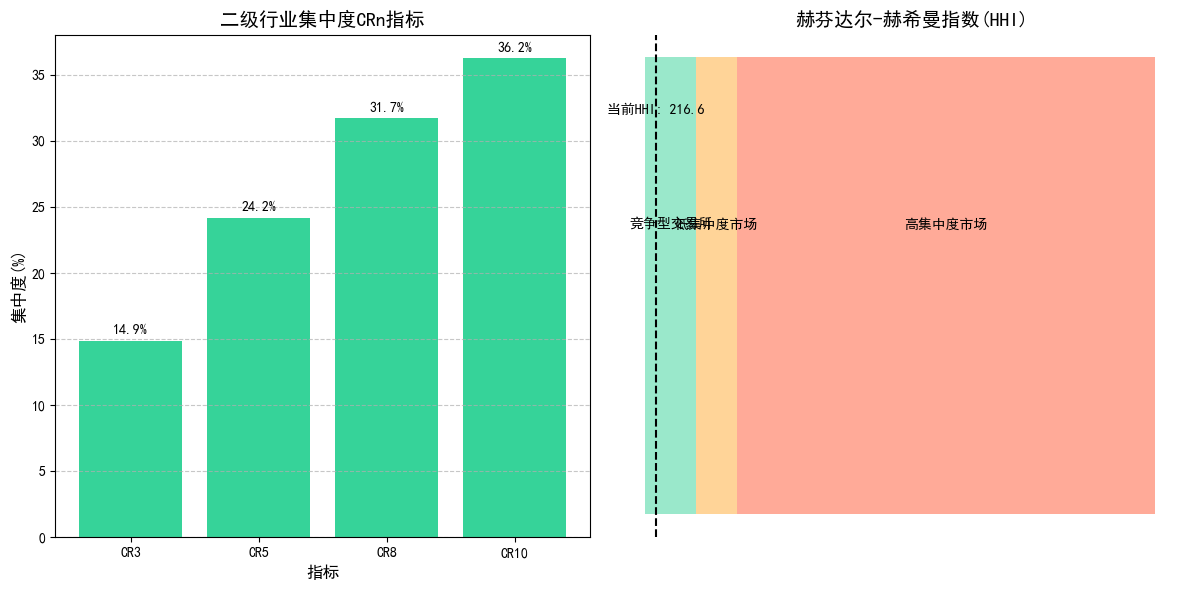

二级行业集中度指标：
CR3: 14.9%
CR5: 24.2%
CR8: 31.7%
CR10: 36.2%
HHI: 216.6


In [ ]:
# 统计行业分布（使用“二级行业”字段）
industry_counts = df['二级行业'].value_counts().reset_index()
industry_counts.columns = ['二级行业', '公司数量']

# 计算行业总数
total = industry_counts['公司数量'].sum()

# 计算行业集中度指标（CRn）
def calculate_crn(data, n):
    """计算前n个行业的集中度"""
    top_n = data.head(n)
    return top_n['公司数量'].sum() / data['公司数量'].sum() * 100

# 计算不同n值的CRn
cr_values = {f'CR{i}': calculate_crn(industry_counts, i) for i in [3, 5, 8, 10]}

# 计算赫芬达尔-赫希曼指数（HHI）
hhi = ((industry_counts['公司数量'] / total) ** 2).sum() * 10000

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制CRn指标图
plt.subplot(1, 2, 1)
plt.bar(cr_values.keys(), cr_values.values(), color='#36D399')
plt.title('二级行业集中度CRn指标', fontsize=14)
plt.xlabel('指标', fontsize=12)
plt.ylabel('集中度(%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签
for i, v in enumerate(cr_values.values()):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

# 绘制HHI指标解读
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('赫芬达尔-赫希曼指数(HHI)', fontsize=14)

# HHI解读区间
hhi_levels = [
    (0, 1000, '竞争型交易所', '#36D399'),
    (1000, 1800, '低集中度市场', '#FFAA33'),
    (1800, 10000, '高集中度市场', '#FF5733')
]

# 绘制解读区间
for level in hhi_levels:
    plt.barh(0, level[1]-level[0], left=level[0], color=level[3], alpha=0.5)
    plt.text(level[0]+(level[1]-level[0])/2, 0.1, level[2], ha='center', fontsize=10)

# 标记当前HHI值
plt.axvline(x=hhi, color='black', linestyle='--')
plt.text(hhi, 0.3, f'当前HHI: {hhi:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 打印集中度指标
print("二级行业集中度指标：")
print(f"CR3: {cr_values['CR3']:.1f}%")
print(f"CR5: {cr_values['CR5']:.1f}%")
print(f"CR8: {cr_values['CR8']:.1f}%")
print(f"CR10: {cr_values['CR10']:.1f}%")
print(f"HHI: {hhi:.1f}")


总结：这组图表呈现了二级行业的市场集中程度。左侧柱状图展示了二级行业集中度 CRn 指标，CR3 为 23.9%，CR5 为 36.7% ，CR8 为 49.8%，CR10 是 54.4%，显示出头部企业的集中趋势逐步上升。右侧图表的赫芬达尔 - 赫希曼指数（HHI）为 404.3，处于竞争型到中低集中度市场区间，说明二级行业市场集中程度相对较低，竞争较为充分。